<a href="https://colab.research.google.com/github/CoffeeAddict2109/TimeSeries-Gold-Predict-Statistical-Approach/blob/main/TimeSeries_Gold_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = 20, 8            #agar semua plot ukurannya sama
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/FINAL_USO.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [ ]:
len(data)

1718

In [ ]:
data = data[['Date','Close']]
data

,Date,Close
0,2011-12-15,152.330002
1,2011-12-16,155.229996
2,2011-12-19,154.869995
3,2011-12-20,156.979996
4,2011-12-21,157.160004
...,...,...
1713,2018-12-24,120.019997
1714,2018-12-26,119.660004
1715,2018-12-27,120.570000
1716,2018-12-28,121.059998


In [ ]:
min(data['Close'])

100.5

In [ ]:
#Mengubah tanggal menjadi index
con=data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['2011-12-15', '2011-12-16', '2011-12-19', '2011-12-20',
               '2011-12-21', '2011-12-22', '2011-12-23', '2011-12-27',
               '2011-12-28', '2011-12-29',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1718, freq=None)

In [ ]:
data.head(3)

,Close
Date,
2011-12-15,152.330002
2011-12-16,155.229996
2011-12-19,154.869995


In [ ]:
ts = data['Close']
ts.head(10)

Date
2011-12-15    152.330002
2011-12-16    155.229996
2011-12-19    154.869995
2011-12-20    156.979996
2011-12-21    157.160004
2011-12-22    156.039993
2011-12-23    156.309998
2011-12-27    154.910004
2011-12-28    151.029999
2011-12-29    150.339996
Name: Close, dtype: float64

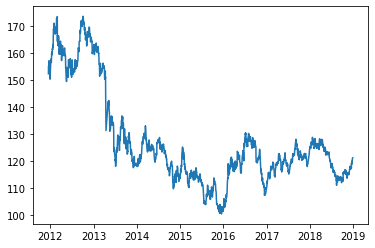

In [ ]:
plt.plot(ts)

##Uji Stationer
Ho : data tidak stasioner

Ha : data stasioner

In [ ]:
#Uji Stationer
def test_stationer(timeseries):

  rolmean =timeseries.rolling(window=12).mean()
  rolstd=timeseries.rolling(window=12).std()

  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  print('hasil dari Dicky-Fuller Test:')
  dftest=adfuller(timeseries, autolag='AIC')
  dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Crictical Value (%s)'%key] = value
  print(dfoutput)

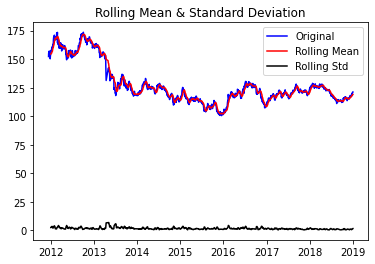

hasil dari Dicky-Fuller Test:
Test Statistic                   -1.823460
p-value                           0.368878
#Lags Used                        1.000000
Number of Observations Used    1716.000000
Crictical Value (1%)             -3.434166
Crictical Value (5%)             -2.863226
Crictical Value (10%)            -2.567667
dtype: float64


In [ ]:
test_stationer(ts)

Karena p-value > 0.05, maka H_0 gagal ditolak<br>
Dan data tidak stationer

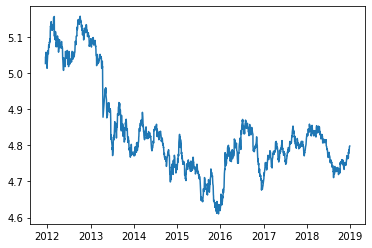

In [ ]:
#transformasi log
ts_log = np.log(ts)
plt.plot(ts_log)


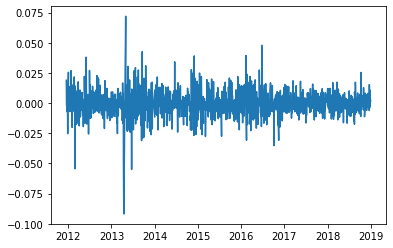

In [ ]:
#differencing
ts_log_1 = ts_log - ts_log.shift()
ts_log_1 = ts_log_1.dropna()
plt.plot(ts_log_1)

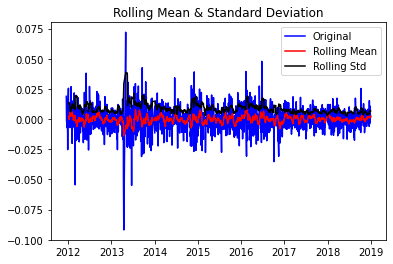

hasil dari Dicky-Fuller Test:
Test Statistic                  -44.337088
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1716.000000
Crictical Value (1%)             -3.434166
Crictical Value (5%)             -2.863226
Crictical Value (10%)            -2.567667
dtype: float64


In [ ]:
test_stationer(ts_log_1)

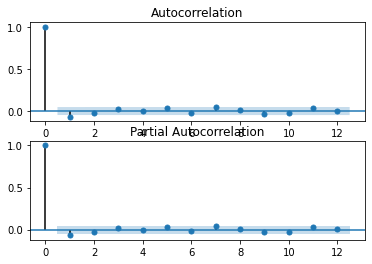

In [ ]:
plt.figure()
plt.subplot(211)
plot_acf(ts_log_1, ax=plt.gca(), lags=12)
plt.subplot(212)
plot_pacf(ts_log_1, ax=plt.gca(), lags=12)
plt.show()

##ARIMA

In [ ]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [ ]:
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(ts_log.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.076
ARIMA(0, 0, 1) RMSE=0.040
ARIMA(0, 0, 2) RMSE=0.026
ARIMA(0, 1, 0) RMSE=0.006
ARIMA(0, 1, 1) RMSE=0.006
ARIMA(0, 1, 2) RMSE=0.006
ARIMA(1, 0, 0) RMSE=0.006
ARIMA(1, 0, 1) RMSE=0.006
ARIMA(1, 0, 2) RMSE=0.006
ARIMA(1, 1, 0) RMSE=0.006
ARIMA(1, 1, 1) RMSE=0.006
ARIMA(2, 0, 0) RMSE=0.006
ARIMA(2, 0, 1) RMSE=0.006
ARIMA(2, 1, 0) RMSE=0.006
ARIMA(2, 1, 1) RMSE=0.006
Best ARIMA(2, 0, 0) RMSE=0.006


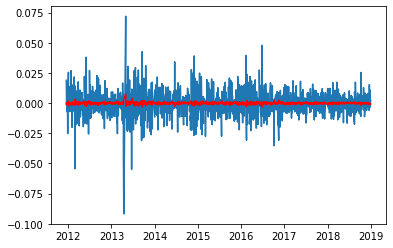

In [ ]:
model_ARIMA = ARIMA(ts_log, order=(2,1,0))
results_ARIMA = model_ARIMA.fit(disp=-1)
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(ts_log_1)             
plt.plot(predictions_ARIMA_diff, color='red')               #fitting dengan data yang udah difference sekali dan log

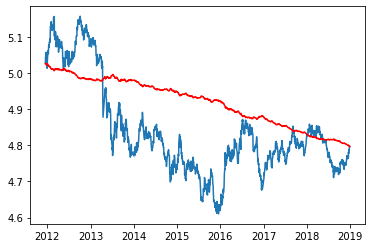

In [ ]:
predictions_ARIMA_diff_cum_sum = predictions_ARIMA_diff.cumsum()                                
predictions_ARIMA_log = pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cum_sum,fill_value=0)
plt.plot(ts_log)             
plt.plot(predictions_ARIMA_log, color='red')      

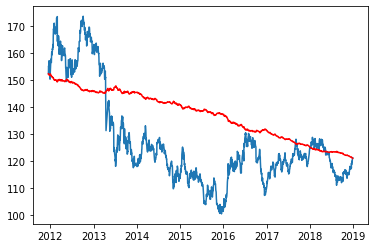

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA, color='red')    

In [ ]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1717
Model:                 ARIMA(2, 1, 0)   Log Likelihood                5540.866
Method:                       css-mle   S.D. of innovations              0.010
Date:                Sun, 10 Apr 2022   AIC                         -11073.733
Time:                        05:33:08   BIC                         -11051.939
Sample:                             1   HQIC                        -11065.669
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.000     -0.635      0.526      -0.001       0.000
ar.L1.D.Close    -0.0693      0.024     -2.871      0.004      -0.117      -0.022
ar.L2.D.Close    -0.0285      0.024     

##SARIMA

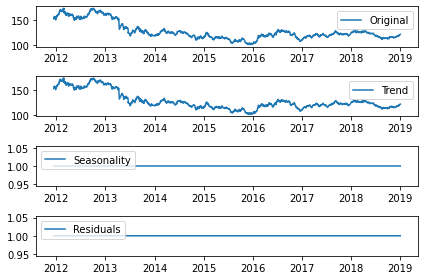

In [ ]:
decomposition = seasonal_decompose(ts, model='multiplicative', freq=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
train_size = int(len(ts) * 0.7)               #data trainingnya 70%
train, test = ts_log[:train_size], ts_log[train_size:]
history = [x for x in train]
# make predictions
predictions = list()
for t in range(len(test)):
		model = SARIMAX(history, order=(1,1,1), seasonal_order=(1,1,1,1))
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])

# calculate out of sample error
rmse = sqrt(mean_squared_error(test, predictions))
print(rmse)

0.006493230507417152


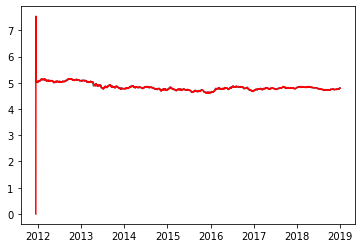

In [ ]:
#Bikin model SARIMA
model_sarima = SARIMAX(ts_log, order=(1,1,1), seasonal_order=(1,1,1,1))
results_SARIMA = model_sarima.fit(disp=-1)
predictions_SARIMA_diff = pd.Series(results_SARIMA.fittedvalues,copy=True)
plt.plot(ts_log)             
plt.plot(predictions_SARIMA_diff, color='red')               #fitting dengan data log

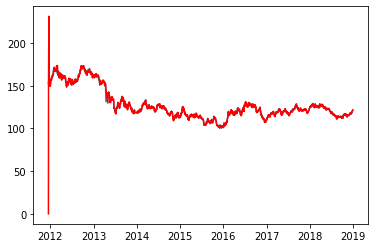

In [ ]:
#SARIMA + trend untuk data asli
model_sarima_trend = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,2), trend='t')
results_SARIMA_t = model_sarima_trend.fit(disp=-1)
predictions_SARIMA_diff_t = pd.Series(results_SARIMA_t.fittedvalues,copy=True)
plt.plot(ts)
             
plt.plot(predictions_SARIMA_diff_t, color='red')               #fitting dengan data asli

In [ ]:
print(results_SARIMA_t.summary())

                                 Statespace Model Results                                
Dep. Variable:                             Close   No. Observations:                 1718
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood               -3063.599
Date:                           Sun, 10 Apr 2022   AIC                           6139.198
Time:                                   05:08:58   BIC                           6171.881
Sample:                                        0   HQIC                          6151.292
                                          - 1718                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       6.101e-07    1.9e-05      0.032      0.974   -3.67e-05    3.79e-05
ar.L1          0.0584      3.125      0.019

In [ ]:
#dengan model ARIMA(2,1,1)
predict_dif = results_ARIMA.predict(start=1718,end=1800)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_log = [ts_log[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data lognya
  a = pred_log[i] + j
  pred_log.append(a)
predict_exp = pd.Series(np.exp(pred_log[1:]), index=predict_dif.index)  #prediksi data aslinya
print(predict_exp)

1717    121.303274
1718    121.254358
1719    121.267501
1720    121.195260
1721    121.167869
           ...    
1795     80.835445
1796     79.993141
1797     79.149050
1798     78.303408
1799     77.456462
Length: 83, dtype: float64


In [ ]:
#prediksi dengan SARIMA+trend
pred_2 = results_SARIMA_t.predict(start=1718,end=1800)
print(pred_2)

1718    121.265045
1719    121.899466
1720    121.905577
1721    122.526825
1722    122.534230
           ...    
1796    147.355940
1797    148.019697
1798    148.069231
1799    148.734121
1800    148.784789
Length: 83, dtype: float64
